In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
matches = pd.read_csv('C:/Users/Hp/Desktop/WPL/matches.csv')
deliveries = pd.read_csv('C:/Users/Hp/Desktop/WPL/deliveries.csv')

In [3]:
all_matches = matches[(matches['team1'].isin(['Kolkata Knight Riders', 'Kings XI Punjab'])) & (matches['team2'].isin(['Kolkata Knight Riders', 'Kings XI Punjab']))]

In [4]:
data = pd.merge(matches, deliveries, how = "inner", left_on = 'id', right_on = 'match_id')

In [5]:
sub_data = data[(data['team1'].isin(['Kolkata Knight Riders', 'Kings XI Punjab'])) & (data['team2'].isin(['Kolkata Knight Riders', 'Kings XI Punjab']))]

### Who will win the match??

In [6]:
all_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
10,11,2017,Kolkata,4/13/2017,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN
47,48,2017,Chandigarh,5/9/2017,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kings XI Punjab,14,0,MM Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",A Nand Kishore,S Ravi,NaN
80,81,2008,Chandigarh,5/3/2008,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali",DJ Harper,I Shivram,NaN
111,112,2008,Kolkata,5/25/2008,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kolkata Knight Riders,0,3,Umar Gul,Eden Gardens,SJ Davis,I Shivram,NaN
122,123,2009,Durban,4/21/2009,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,NaN


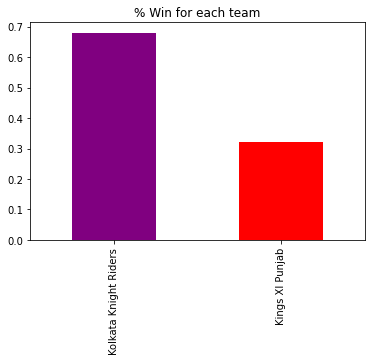

In [7]:
all_matches['winner'].value_counts(normalize=True).plot.bar(title='% Win for each team', color=['Purple', 'Red'])

In [8]:
all_matches.groupby('venue')['winner'].value_counts()

venue                                                 winner               
Barabati Stadium                                      Kolkata Knight Riders    1
Eden Gardens                                          Kolkata Knight Riders    8
                                                      Kings XI Punjab          3
Holkar Cricket Stadium                                Kolkata Knight Riders    1
IS Bindra Stadium                                     Kolkata Knight Riders    1
Kingsmead                                             Kolkata Knight Riders    1
M Chinnaswamy Stadium                                 Kolkata Knight Riders    1
Maharashtra Cricket Association Stadium               Kolkata Knight Riders    1
Punjab Cricket Association IS Bindra Stadium, Mohali  Kings XI Punjab          1
                                                      Kolkata Knight Riders    1
Punjab Cricket Association Stadium, Mohali            Kings XI Punjab          2
                                 

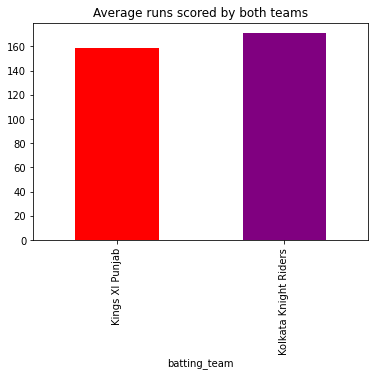

In [9]:
sub_data[(sub_data['venue']=='Eden Gardens')].groupby(['match_id', 'inning','batting_team'])['total_runs'].sum().groupby(['batting_team']).mean().plot.bar(title='Average runs scored by both teams', color=['Red', 'Purple'])

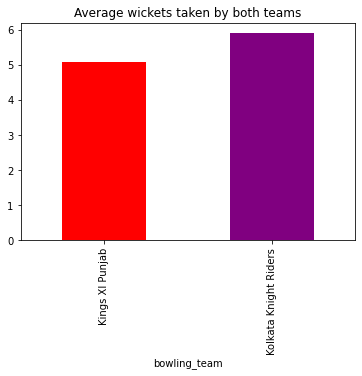

In [10]:
sub_data[(sub_data['venue']=='Eden Gardens')].groupby(['match_id', 'inning','bowling_team'])['player_dismissed'].count().groupby(['bowling_team']).mean().plot.bar(title='Average wickets taken by both teams', color=['Red', 'Purple'])

In [11]:
all_matches.groupby('toss_winner')['toss_decision'].value_counts()

toss_winner            toss_decision
Kings XI Punjab        bat               5
                       field             5
Kolkata Knight Riders  field            12
                       bat               3
Name: toss_decision, dtype: int64

In [12]:
all_matches.groupby('toss_decision')['winner'].value_counts()

toss_decision  winner               
bat            Kolkata Knight Riders     5
               Kings XI Punjab           3
field          Kolkata Knight Riders    12
               Kings XI Punjab           5
Name: winner, dtype: int64

In [13]:
all_matches.groupby(['id', 'winner'])['win_by_runs', 'win_by_wickets'].max()

,,win_by_runs,win_by_wickets
id,winner,,
11,Kolkata Knight Riders,0,8
48,Kings XI Punjab,14,0
81,Kings XI Punjab,9,0
112,Kolkata Knight Riders,0,3
123,Kolkata Knight Riders,11,0
142,Kings XI Punjab,0,6
196,Kolkata Knight Riders,39,0
208,Kings XI Punjab,0,8
270,Kolkata Knight Riders,0,8


In [14]:
all_matches['player_of_match'].value_counts()

AD Russell          4
SP Narine           3
DPMD Jayawardene    2
G Gambhir           2
KL Rahul            1
RV Uthappa          1
UT Yadav            1
JH Kallis           1
S Gill              1
Iqbal Abdulla       1
MK Tiwary           1
MS Gony             1
Sandeep Sharma      1
MM Sharma           1
Umar Gul            1
MK Pandey           1
CH Gayle            1
IK Pathan           1
Name: player_of_match, dtype: int64

In [15]:
sub_data1 = sub_data[(sub_data['batsman'].isin(['AD Russell', 'SP Narine', 'CH Gayle', 'KL Rahul', 'Sandeep Sharma', 'S Gill'])) & (sub_data['bowler'].isin(['AD Russell', 'SP Narine', 'CH Gayle', 'KL Rahul', 'Sandeep Sharma', 'S Gill'])) & (sub_data['player_of_match'].isin(['AD Russell', 'SP Narine', 'CH Gayle', 'KL Rahul', 'Sandeep Sharma', 'S Gill']))]

In [16]:
sub_data1[sub_data1['season']>2015].groupby(['match_id','batsman'])['batsman_runs'].sum()

match_id  batsman       
11        SP Narine         11
608       AD Russell         8
          Sandeep Sharma     1
7911      CH Gayle          26
          KL Rahul          27
7937      CH Gayle          12
          KL Rahul          39
11142     CH Gayle           0
11343     CH Gayle           2
Name: batsman_runs, dtype: int64

In [17]:
sub_data1[sub_data1['season']>2015].groupby(['match_id','bowler'])['player_dismissed'].count()

match_id  bowler        
11        Sandeep Sharma    0
608       AD Russell        0
          Sandeep Sharma    1
7911      AD Russell        0
          SP Narine         1
7937      AD Russell        1
          SP Narine         1
11142     AD Russell        1
11343     SP Narine         0
Name: player_dismissed, dtype: int64

In [145]:
sub_data.groupby(['match_id','inning','batting_team'])['total_runs'].sum().groupby(['batting_team']).mean()

batting_team
Kings XI Punjab          160.44
Kolkata Knight Riders    164.00
Name: total_runs, dtype: float64

In [147]:
sub_data[sub_data['batsman']=='GJ Maxwell'].groupby('match_id')['batsman_runs'].sum().mean()

25.2

### How many dot balls will be bowled in the match??

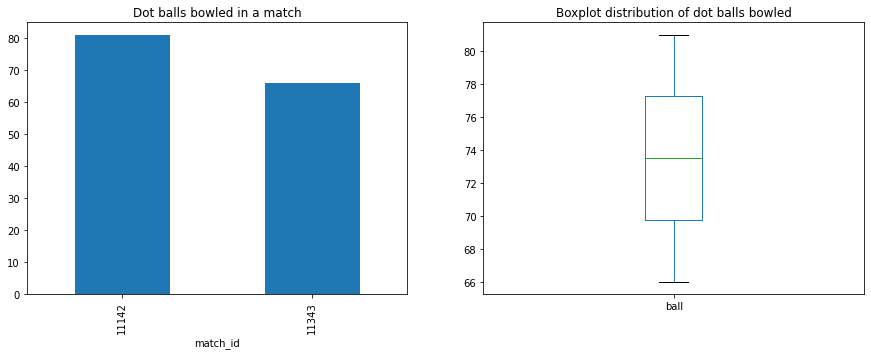

In [149]:
plt.subplot(1, 2, 1)
sub_data[(sub_data['total_runs']==0)&(sub_data['season']>2018)].groupby(['match_id'])['ball'].count().plot.bar(title='Dot balls bowled in a match', figsize=(15,5))

plt.subplot(1, 2, 2)
sub_data[(sub_data['total_runs']==0)&(sub_data['season']>2018)].groupby(['match_id'])['ball'].count().plot.box(title='Boxplot distribution of dot balls bowled')

In [54]:
sub_data[(sub_data['total_runs']==0) & (sub_data['season']>2017)].groupby(['bowling_team', 'bowler'])['ball'].count().sort_values(ascending=False).head(10)

bowling_team           bowler        
Kings XI Punjab        AJ Tye            27
Kolkata Knight Riders  AD Russell        25
                       SP Narine         24
Kings XI Punjab        R Ashwin          22
Kolkata Knight Riders  P Krishna         20
Kings XI Punjab        Mohammed Shami    17
Kolkata Knight Riders  PP Chawla         14
Kings XI Punjab        M Ur Rahman       13
                       BB Sran           12
Kolkata Knight Riders  L Ferguson        10
Name: ball, dtype: int64

In [53]:
sub_data[(sub_data['total_runs']==0) & (sub_data['season']>2017)].groupby('batsman')['ball'].count().sort_values(ascending=False).head(10)

batsman
CH Gayle      44
CA Lynn       30
RV Uthappa    30
KL Rahul      18
SP Narine     17
N Rana        17
AD Russell    16
S Gill        15
DA Miller     14
MA Agarwal    12
Name: ball, dtype: int64

In [52]:
sub_data[(sub_data['total_runs']==0) & (sub_data['season']>2017)].groupby(['bowler', 'batsman'])['ball'].count().sort_values(ascending=False).head(15)

bowler          batsman   
R Ashwin        RV Uthappa    10
AD Russell      CH Gayle       8
SP Narine       CH Gayle       8
Mohammed Shami  CA Lynn        8
S Mavi          CH Gayle       8
AJ Tye          RV Uthappa     6
SP Narine       KL Rahul       6
H Viljoen       RV Uthappa     6
AJ Tye          AD Russell     6
V Chakravarthy  N Rana         5
L Ferguson      CH Gayle       5
BB Sran         CA Lynn        5
P Krishna       CH Gayle       4
PP Chawla       DA Miller      4
                CH Gayle       4
Name: ball, dtype: int64

Text(0.5, 1.0, 'Ball vs Dot balls')

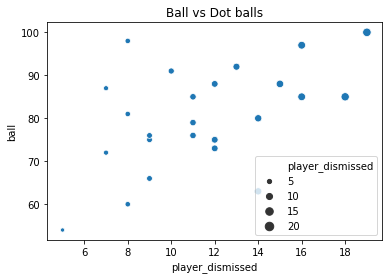

In [47]:
sns.scatterplot(sub_data.groupby(['match_id'])['player_dismissed'].count(), sub_data[sub_data['total_runs']==0].groupby('match_id')['ball'].count(), size = sub_data.groupby(['match_id'])['player_dismissed'].count())
plt.title('Ball vs Dot balls')

### How many wickets will fall from 90th ball to 120th ball of both innings??

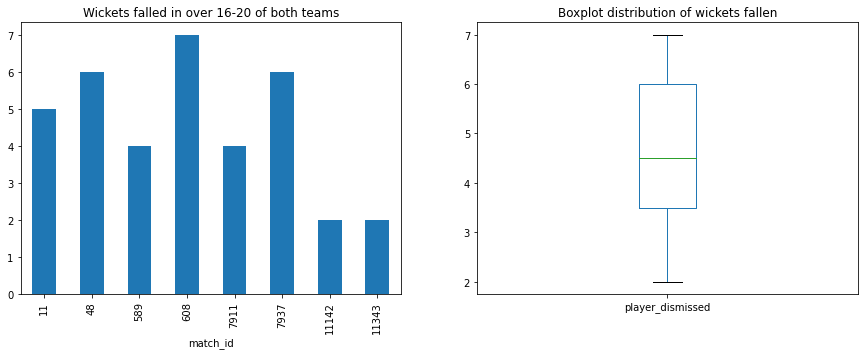

In [71]:
plt.subplot(1, 2, 1)
sub_data[(sub_data['season']>2015) & (sub_data['over']>15)].groupby('match_id')['player_dismissed'].count().plot.bar(title='Wickets falled in over 16-20 of both teams', figsize=(15,5))

plt.subplot(1, 2, 2)
sub_data[(sub_data['season']>2015) & (sub_data['over']>15)].groupby('match_id')['player_dismissed'].count().plot.box(title='Boxplot distribution of wickets fallen')

In [143]:
sub_data[(sub_data['season']>2015) & (sub_data['over']>15)].groupby('match_id')['player_dismissed'].count().describe()

count    8.00000
mean     4.50000
std      1.85164
min      2.00000
25%      3.50000
50%      4.50000
75%      6.00000
max      7.00000
Name: player_dismissed, dtype: float64

In [78]:
sub_data2 = sub_data[(sub_data['match_id'].isin([11142, 11343])) & (sub_data['over']>15) & (sub_data['season']>2015)]

In [84]:
sub_data2.groupby(['bowler','batsman'])['batsman_runs'].sum()

bowler          batsman      
AD Russell      AJ Tye            1
                Mandeep Singh     1
                R Ashwin          0
                S Curran         15
AJ Tye          AD Russell       22
                KD Karthik        4
                RV Uthappa        7
                S Gill            6
H Gurney        Mandeep Singh     1
                R Ashwin          1
                S Curran         24
H Viljoen       AD Russell        1
                RV Uthappa        5
L Ferguson      DA Miller        15
                Mandeep Singh    15
Mohammed Shami  AD Russell       26
                RV Uthappa        9
P Krishna       DA Miller         5
                Mandeep Singh     5
PP Chawla       DA Miller         4
                MA Agarwal        0
                Mandeep Singh    13
S Curran        KD Karthik       19
                S Gill            6
SP Narine       Mandeep Singh     2
                S Curran         13
Name: batsman_runs, dtype: int64

In [86]:
sub_data2.groupby(['bowler','batsman'])['player_dismissed'].count()

bowler          batsman      
AD Russell      AJ Tye           0
                Mandeep Singh    0
                R Ashwin         1
                S Curran         0
AJ Tye          AD Russell       1
                KD Karthik       0
                RV Uthappa       0
                S Gill           0
H Gurney        Mandeep Singh    1
                R Ashwin         0
                S Curran         0
H Viljoen       AD Russell       0
                RV Uthappa       0
L Ferguson      DA Miller        0
                Mandeep Singh    0
Mohammed Shami  AD Russell       0
                RV Uthappa       0
P Krishna       DA Miller        0
                Mandeep Singh    0
PP Chawla       DA Miller        0
                MA Agarwal       1
                Mandeep Singh    0
S Curran        KD Karthik       0
                S Gill           0
SP Narine       Mandeep Singh    0
                S Curran         0
Name: player_dismissed, dtype: int64

In [89]:
sub_data.groupby(['bowler'])['player_dismissed'].count().sort_values(ascending=False).head(10)

bowler
SP Narine          29
PP Chawla          24
AD Russell         15
UT Yadav           15
M Morkel           12
Sandeep Sharma      9
AR Patel            9
AJ Tye              8
Karanveer Singh     7
R Bhatia            7
Name: player_dismissed, dtype: int64

### What would be Glen Maxwell's contribution to the team total?

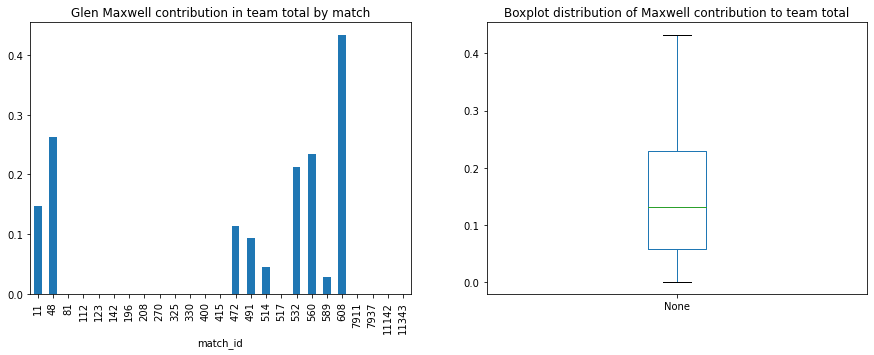

In [106]:
plt.subplot(1, 2, 1)
(sub_data[sub_data['batsman']=='GJ Maxwell'].groupby('match_id')['batsman_runs'].sum()/sub_data[sub_data['batting_team']=='Kings XI Punjab'].groupby('match_id')['total_runs'].sum()).plot.bar(title='Glen Maxwell contribution in team total by match', figsize=(15,5))

plt.subplot(1, 2, 2)
(sub_data[sub_data['batsman']=='GJ Maxwell'].groupby('match_id')['batsman_runs'].sum()/sub_data[sub_data['batting_team']=='Kings XI Punjab'].groupby('match_id')['total_runs'].sum()).plot.box(title='Boxplot distribution of Maxwell contribution to team total')

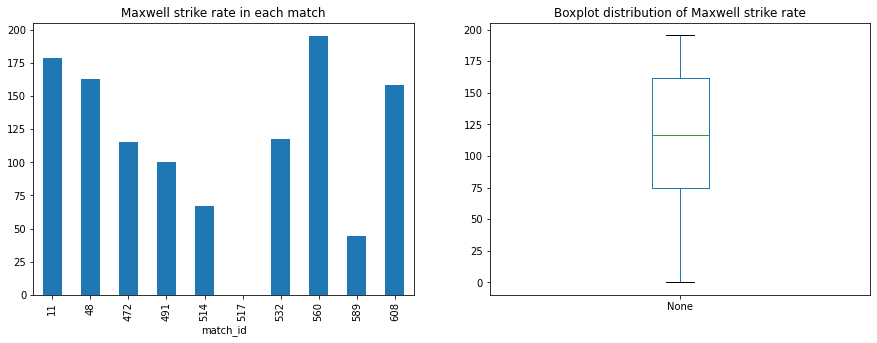

In [116]:
plt.subplot(1, 2, 1)
((sub_data[sub_data['batsman']=='GJ Maxwell'].groupby('match_id')['batsman_runs'].sum()/sub_data[sub_data['batsman']=='GJ Maxwell'].groupby('match_id')['ball'].count())*100).plot.bar(title='Maxwell strike rate in each match', figsize=(15,5))

plt.subplot(1, 2, 2)
((sub_data[sub_data['batsman']=='GJ Maxwell'].groupby('match_id')['batsman_runs'].sum()/sub_data[sub_data['batsman']=='GJ Maxwell'].groupby('match_id')['ball'].count())*100).plot.box(title='Boxplot distribution of Maxwell strike rate')

In [119]:
sub_data3 = sub_data[(sub_data['bowling_team']=='Kolkata Knight Riders') & (sub_data['season']>2015) & (sub_data['batsman']=='GJ Maxwell')]

In [122]:
(sub_data3.groupby('bowler')['batsman_runs'].sum()/sub_data3.groupby('bowler')['ball'].count())*100

bowler
AS Rajpoot         125.000000
C de Grandhomme    181.818182
CR Woakes           88.888889
GB Hogg            312.500000
Kuldeep Yadav      280.000000
M Morkel           128.571429
PP Chawla          172.222222
SP Narine           87.500000
Shakib Al Hasan    125.000000
UT Yadav           100.000000
YK Pathan           40.000000
dtype: float64

In [123]:
sub_data3.groupby('bowler')['player_dismissed'].count()

bowler
AS Rajpoot         0
C de Grandhomme    0
CR Woakes          0
GB Hogg            0
Kuldeep Yadav      1
M Morkel           0
PP Chawla          1
SP Narine          1
Shakib Al Hasan    0
UT Yadav           1
YK Pathan          0
Name: player_dismissed, dtype: int64

In [139]:
sub_data3['dismissal_kind'].value_counts()

caught    3
lbw       1
Name: dismissal_kind, dtype: int64

### How many no-balls will be bowled in the match??

In [138]:
sub_data[sub_data['noball_runs']!=0].groupby(['match_id', 'bowling_team'])['ball'].count()

match_id  bowling_team         
11        Kolkata Knight Riders    2
81        Kolkata Knight Riders    1
196       Kings XI Punjab          2
208       Kings XI Punjab          1
415       Kings XI Punjab          1
472       Kolkata Knight Riders    1
517       Kolkata Knight Riders    1
7911      Kings XI Punjab          1
11142     Kings XI Punjab          1
Name: ball, dtype: int64

In [140]:
sub_data[sub_data['noball_runs']!=0].groupby(['match_id', 'bowler'])['ball'].count()

match_id  bowler         
11        C de Grandhomme    2
81        I Sharma           1
196       B Lee              1
          VS Malik           1
208       J Theron           1
415       Harmeet Singh      1
472       M Morkel           1
517       SP Narine          1
7911      AJ Tye             1
11142     Mohammed Shami     1
Name: ball, dtype: int64

In [142]:
sub_data[sub_data['noball_runs']!=0].groupby(['match_id', 'bowler'])['ball'].count().describe()

count    10.000000
mean      1.100000
std       0.316228
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: ball, dtype: float64